In [1]:
import sqlite3
import numpy as np
import pandas as pd
import re
import html
import pickle
from pathlib import Path
from collections import Counter
MODEL_PATH = Path('models/')

In [2]:
# re1 = re.compile(r'  +')
# def clean_text(x, remove_html=True, other=False):
#     if remove_html:
#         x = re.sub(r'<code>[^>]*</code>', '', x)
#         x = re.sub(r'<[^>]*>', '', x)
#         x = re.sub(r'[^A-Za-z0-9]', ' ', x)
#     if other:
#         x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
#             'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
#             '<br />', "\n").replace('\\"', '').replace('<unk>','u_n').replace(' @.@ ','.').replace(
#             ' @-@ ','-').replace('\\', ' \\ ').replace('"',"'").replace('\n', ' ').replace('\r', ' ').strip()
#     return re1.sub(' ', html.unescape(x).strip())


# import sqlite3
# DB_NAME = 'StackOverflow.db'

# connection = sqlite3.connect(DB_NAME)
# c = connection.cursor() 

# def get_data():
#     df = pd.read_sql("SELECT title, tags FROM posts WHERE parent_id is NULL", 
#                  connection, chunksize=10000)
#     all_text = preprocess(df)
#     print(len(all_text))
#     return all_text
    

# def preprocess(df):
#     all_text = []
#     for i, data in enumerate(df): 
#         all_text.extend([(clean_text(title, remove_html=True), tag.split()[0]) 
#                          for title, tag in zip(data['title'], data['tags'])])
#     return all_text


# all_titles_tags = get_data()
# all_titles_tags[:10]




import nltk
import pickle
import re
import numpy as np

# nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))


re1 = re.compile(r'  +')
def clean_title(text, remove_html=False, other=False):
    
    replace_by_space_re = re.compile('[/(){}\[\]\|@,;]')
    bad_symbols_re = re.compile('[^0-9a-z #+_]')
    
    if remove_html:
        x = re.sub(r'<code>[^>]*</code>', '', x)
        x = re.sub(r'<[^>]*>', '', x)
        x = re.sub(r'[^A-Za-z0-9]', ' ', x)
    text = text.lower()
    text = text.replace('π', 'pi').replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
            'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
            '<br />', "\n").replace('\\"', '').replace('<unk>','u_n').replace(' @.@ ','.').replace(
            ' @-@ ','-').replace('\\', ' \\ ').replace('"',"'").replace('\n', ' ').replace('\r', ' ')
    text = replace_by_space_re.sub(' ', text)
    text = bad_symbols_re.sub('', text)
    text = ' '.join([x for x in text.split() if x and x not in stopwords_set])
    return re1.sub(' ', html.unescape(text).strip())
    
#     if other:
#         x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
#             'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
#             '<br />', "\n").replace('\\"', '').replace('<unk>','u_n').replace(' @.@ ','.').replace(
#             ' @-@ ','-').replace('\\', ' \\ ').replace('"',"'").replace('\n', ' ').replace('\r', ' ').strip()
#     return re1.sub(' ', html.unescape(x).strip())

def clean_tags(tags):
    bad_symbols_re = re.compile('[^a-z #+]')
    tag = tags.lower().split()[0]
    tag = bad_symbols_re.sub('', tag)
    return tag

def text_prepare(text):
    """Performs tokenization and simple preprocessing."""
    
    replace_by_space_re = re.compile('[/(){}\[\]\|@,;]')
    bad_symbols_re = re.compile('[^0-9a-z #+_]')
    stopwords_set = set(stopwords.words('english'))

    text = text.lower()
    text = replace_by_space_re.sub(' ', text)
    text = bad_symbols_re.sub('', text)
    text = ' '.join([x for x in text.split() if x and x not in stopwords_set])

    return text.strip()


import sqlite3
DB_NAME = 'StackOverflow.db'

connection = sqlite3.connect(DB_NAME)
c = connection.cursor() 

def get_data():
    df = pd.read_sql("SELECT title, tags FROM posts WHERE parent_id is NULL", 
                 connection, chunksize=10000)
    all_text = preprocess(df)
    print(len(all_text))
    return all_text
    

def preprocess(df):
    all_text = []
    for i, data in enumerate(df): 
        all_text.extend([(clean_title(title), clean_tags(tag)) for title, tag in zip(data['title'], data['tags'])])
    return all_text



all_titles_tags = get_data()
all_titles_tags[:100]

16022817


[('applying opacity form use decimal double value', 'c#'),
 ('percentage width child element absolutely positioned parent internet explorer 7',
  'html'),
 ('calculate someones age c#', 'c#'),
 ('calculate relative time c#', 'c#'),
 ('determine users timezone', 'javascript'),
 ('difference mathfloor mathtruncate', 'net'),
 ('filling dataset datatable linq query result set', 'c#'),
 ('binary data mysql', 'mysql'),
 ('fastest way get value pi', 'performance'),
 ('throw error mysql trigger', 'mysql'),
 ('use c socket api c++ z os', 'c++'),
 ('unloading bytearray using actionscript 3', 'arrays'),
 ('check changes sql server table', 'sql'),
 ('reliable timer console application', 'c#'),
 ('best way allow plugins php application', 'php'),
 ('multiple submit buttons html form', 'html'),
 ('get distinct ordered list names datatable using linq', 'c#'),
 ('microsoft office 2007 file type mime types identifying characters', 'mime'),
 ('paging collection linq', 'linq'),
 ('add existing comments rd

In [3]:
combine_tags = {}
# combine_tags['c#'] = ['c#']
combine_tags['c++c'] = ['c++', 'c', 'objective-c', 'objectivec', 'visualc++', 'cmake', 'qt']
# combine_tags['c'] = ['c#', 'c++', 'c', 'objective-c']
combine_tags['java'] = ['java', 'javafx', 'javame', 'jsf', 'spring', 'hibernate']
combine_tags['php'] = ['php', 'laravel', 'symfony', 'magento', 'drupal']
combine_tags['ruby'] = ['ruby', 'ruby-on-rails', 'rubyonrails', 'ruby-on-rails-3', 'rubyonrails3']
combine_tags['sql'] = ['sql', 'sql-server', 'sqlserver', 'mysql', 'mongodb', 'database', 'postgresql', 'sqlite', 'cassandra', 'sparql', 'plsql', 'couchdb', 'hbase', 'sqlserver2008', 'hive']
combine_tags['python'] = ['python', 'django', 'python-3.x', 'python3x', 'pythonx', 'python-2.7', 'python27', 'apache-spark', 'apachespark', 'pandas', 'numpy', 'matplotlib', 'flask', 'heroku']
combine_tags['javascript'] = ['javascript', 'json', 'jquery', 'node.js', 'angularjs', 'vue.js', 'knockout.js', 'angular', 'jquerymobile',
                              'd3.js', 'reactjs', 'ajax', 'ember.js', 'react-native', 'npm', 'nodejs', 'angularjs', 'vuejs', 'knockoutjs',  
                              'd3js', 'djs', 'emberjs', 'reactnative', 'clojure', 'd', 'extjs']
combine_tags['ios'] = ['ios', 'iphone', 'swift', 'swift3', 'ios7', 'ios5', 'ios4']
combine_tags['.net'] = ['.net', 'asp.net', 'asp.net-mvc', 'vb.net', 'net', 'aspnet', 'aspnetmvc', 'vbnet', 'aspnetmvc3']
combine_tags['bash'] = ['git', 'bash', 'powershell', 'shell', 'vim', 'version-control', 'versioncontrol', 'ssh']
combine_tags['java'] = ['java', 'eclipse']
combine_tags['excel'] = ['excel-formula', 'excelformula', 'excel', 'excelvba']
combine_tags['basic'] = ['html', 'html5', 'css', 'xml', 'css3', 'http', 'curl']
combine_tags['os'] = ['macos', 'windows', 'linux', 'ubuntu', 'email', 'internet-explorer', 'google-chrome', 'internetexplorer', 'googlechrome']
combine_tags['frameworks'] = ['sharepoint', 'vba', 'wpf', 'entityframework', 'wordpress', 'oracle', 'facebook', 'azure', 'amazon-web-services', 'visual-studio', 'amazonwebservices', 'visualstudio', 
                              'docker', 'elasticsearch', 'google-app-engine', 'visual-studio-2010', 'visual-studio-2011', 'aws', 'visualstudiocode',
                             'visual-studio-2012', 'visual-studio-2013', 'visual-studio-2014', 'visual-studio-2015', 'visualstudio', 'visual-studio-', 'androidstudio',
                             'visual-studio-2016', 'visual-studio-2017', 'visual-studio-2018', 'amazon-ec2', 'amazonec', 'amazon-s3', 'amazons', 'tableau', 'googleappengine', 'visualstudio2010']
combine_tags['machine_learning'] = ['tensorflow', 'machine-learning', 'machinelearning', 'algorithms', 'hadoop', 'validation', 'nlp', 'cuda',
                                    'neural-network', 'neuralnetwork', 'artificial-intelligence', 'artificialintelligence', 'vector', 'deep-learning', 'deeplearning', 'algorithm', 'math']
combine_tags['list'] = ['list', 'arrays']
combine_tags['actionscript3-flex-flash'] = ['actionscript', 'flex', 'flash', 'googleappsscript']

combine_tags['apache'] = ['apache', 'maven', 'grails', 'cordova', 'htaccess']


In [4]:
%%time
new_tags = []
for title, orig_tag in all_titles_tags:
    for tag, tag_list in combine_tags.items():
#         if orig_tag in tag_list or orig_tag.split('-')[0] in tag_list or orig_tag.split('.')[0] in tag_list or orig_tag.split('-')[-1] in tag_list or orig_tag.split('.')[-1] in tag_list:
        if orig_tag in tag_list:    
            orig_tag = tag
    new_tags.append((title, orig_tag))
    
del all_titles_tags

CPU times: user 45.1 s, sys: 163 ms, total: 45.3 s
Wall time: 45.3 s


In [5]:
counter = Counter([v for v in np.asarray(new_tags)[:,1]])

In [6]:
counter.most_common(25)

[('javascript', 2389291),
 ('java', 1443146),
 ('c#', 1204127),
 ('php', 1192387),
 ('python', 1083448),
 ('c++c', 916555),
 ('android', 866022),
 ('sql', 764783),
 ('ios', 690252),
 ('basic', 520250),
 ('frameworks', 406180),
 ('.net', 385454),
 ('ruby', 367786),
 ('os', 231201),
 ('r', 224438),
 ('bash', 207928),
 ('excel', 119034),
 ('machine_learning', 103975),
 ('apache', 103093),
 ('none', 93695),
 ('actionscript3-flex-flash', 66875),
 ('regex', 62491),
 ('scala', 61836),
 ('matlab', 60639),
 ('list', 51544)]

In [7]:
%%time
# Do I want to keep the None Tag?
# top_tag_names = [k for k, v in c.most_common(26)]
# final_data = [(title, tag) for title, tag in new_tags if tag in top_tag_names]
# len(final_data)

final_data = []
# top 21 tags with the creation of 'Other'
top_tag_names = [k for k, _ in counter.most_common(25)]
top_tag_names.pop(top_tag_names.index('none'))

for title, tag in new_tags:
    if tag in top_tag_names:
        final_data.append((title, tag))
    else:
        final_data.append((title, 'other'))
        
del new_tags
print(len(final_data))

16022817
CPU times: user 4.98 s, sys: 66 ms, total: 5.05 s
Wall time: 5.05 s


In [19]:
def compute_tfidf(X, X_test=None, save_path=MODEL_PATH/'tf_idf.pkl', load=True, save=False):
    
    if load:
        with open(save_path, mode='rb') as f:
            vect = pickle.load(f) 
    else:
        vect = TfidfVectorizer(token_pattern='(\S+)', min_df=2, max_df=0.9, ngram_range=(1,1))
        vect.fit(X)
        if save:
            # save vect
            with open(save_path, mode='wb') as f:
                pickle.dump(vect, f)

    X = vect.transform(X)
    if X_test: 
        X_test = vect.transform(X_test)
        return X, X_test, vect   
    return X, vect


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X, y = zip(*final_data)

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=100, stratify=y)

In [30]:
list(range(len(le.classes_)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [34]:
class_map = dict(zip(list(range(len(le.classes_))), le.classes_))
DATA_PATH = Path('data')
pickle.dump(class_map, (DATA_PATH/'class_map.pkl').open('wb'))

In [21]:
le.classes_

array(['.net', 'actionscript3-flex-flash', 'android', 'apache', 'bash',
       'basic', 'c#', 'c++c', 'excel', 'frameworks', 'ios', 'java',
       'javascript', 'list', 'machine_learning', 'matlab', 'os', 'other',
       'php', 'python', 'r', 'regex', 'ruby', 'scala', 'sql'],
      dtype='<U24')

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, vect = compute_tfidf(X_train, X_test, load=False, save=True)

In [15]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# clf = LogisticRegression(dual=True, random_state=100)
clf = OneVsRestClassifier(LogisticRegression(penalty='l2', C=4, dual=True, random_state=100))
clf.fit(X_train, y_train)
# with open(MODEL_PATH/'LR_tag_classifier_all.pkl', 'rb') as f:
#     clf = pickle.load(f)
print('training score', clf.score(X_train, y_train))
print('testing score', clf.score(X_test, y_test))

training score 0.6814725667251597
testing score 0.6627628594716786
CPU times: user 1h 22min 39s, sys: 5.47 s, total: 1h 22min 45s
Wall time: 1h 22min 45s


In [16]:
with open(MODEL_PATH/'LR_tag_classifier_all.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [248]:
with open(MODEL_PATH/'LR_tag_classifier.pkl', 'rb') as f:
    model = pickle.load(f)

In [17]:
def find_top_k(y_true, y_pred, k):
    correct = 0
    n = 0
    for i in range(len(y_pred)):
        if y_true[i] in np.argsort(y_pred[i])[-k:][::-1]:
            correct += 1
        n += 1
    return correct / n

for i in [1, 3, 4, 5, 10]:
    print('top {} percent score: {}'.format(i, find_top_k(y_test, clf.predict_proba(X_test), i)))
    
    
# top 1 percent score: 0.6666229789762351
# top 3 percent score: 0.9038671095350257
# top 4 percent score: 0.9359956611882303
# top 5 percent score: 0.9553511803789845
# top 10 percent score: 0.9913760499088176

top 1 percent score: 0.6627628594716786
top 3 percent score: 0.8882275404704041
top 4 percent score: 0.9215762269063748
top 5 percent score: 0.9424620634819588
top 10 percent score: 0.9852273195355125


In [18]:
for i in [1, 3, 5, 10]:
    print('top {} percent score: {}'.format(i, find_top_k(y_train, clf.predict_proba(X_train), i)))

top 1 percent score: 0.6814725667251597
top 3 percent score: 0.9017862374731589
top 5 percent score: 0.9515867476484056
top 10 percent score: 0.989011503387357


In [12]:
re1 = re.compile(r'  +')
def clean_text(x, remove_html=True, other=False):
    if remove_html:
        x = re.sub(r'<code>[^>]*</code>', '', x)
        x = re.sub(r'<[^>]*>', '', x)
        x = re.sub(r'[^A-Za-z0-9]', ' ', x)
    if other:
        x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
            'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
            '<br />', "\n").replace('\\"', '').replace('<unk>','u_n').replace(' @.@ ','.').replace(
            ' @-@ ','-').replace('\\', ' \\ ').replace('"',"'").replace('\n', ' ').replace('\r', ' ').strip()
    return re1.sub(' ', html.unescape(x).strip())


import sqlite3
DB_NAME = 'StackOverflow.db'

connection = sqlite3.connect(DB_NAME)
c = connection.cursor() 

def get_data(column):
    df = pd.read_sql("SELECT {} FROM posts WHERE parent_id is NULL".format(column), 
                 connection, chunksize=1000)
    all_text = preprocess(df, 'comment_id')
    return all_text
    

def preprocess(df, field):
    comment_id = []
#     all_text = []
    for i, data in enumerate(df):  
#         all_text.extend([clean_text(x, remove_html=True) for x in data['title']])
        comment_id.extend(x for x in data['comment_id'])
    return comment_id


comment_ids = get_data('comment_id')
len(comment_ids)

16022817

In [13]:
final_data = np.asarray(final_data)
comment_ids = np.array(comment_ids).reshape(-1, 1)
final_data = np.concatenate((final_data, comment_ids), axis=1)
del comment_ids

In [14]:
DATA_PATH = Path('data')
np.save(DATA_PATH/'title_tags_comments.npy', final_data)

In [3]:
LOAD = True

if LOAD:
    DATA_PATH = Path('data')
    final_data = np.load(DATA_PATH/'title_tags_comments.npy')
else:
    final_data = np.asarray(final_data)
    comment_ids = np.array(comment_ids).reshape(-1, 1)
    final_data = np.concatenate((final_data, comment_ids), axis=1)
    del comment_ids

counter = Counter([v for v in final_data[:,1]])
counts_by_tag = counter.most_common()

In [15]:
counter = Counter([v for v in final_data[:,1]])
counts_by_tag = counter.most_common()

In [25]:
counts_by_tag

[('other', 2500082),
 ('javascript', 2389291),
 ('java', 1443146),
 ('c#', 1204127),
 ('php', 1192387),
 ('python', 1083448),
 ('c++c', 916555),
 ('android', 866022),
 ('sql', 764783),
 ('ios', 690252),
 ('basic', 520250),
 ('frameworks', 406180),
 ('.net', 385454),
 ('ruby', 367786),
 ('os', 231201),
 ('r', 224438),
 ('bash', 207928),
 ('excel', 119034),
 ('machine_learning', 103975),
 ('apache', 103093),
 ('actionscript3-flex-flash', 66875),
 ('regex', 62491),
 ('scala', 61836),
 ('matlab', 60639),
 ('list', 51544)]

In [18]:
import os

embeddings_dim = 100

os.makedirs(MODEL_PATH/'thread_embeddings_by_tags', exist_ok=True)

for tag, count in counts_by_tag:
    tag_posts = final_data[final_data[:,1] == tag]
    tag_post_ids = tag_posts[:,2].astype(np.int32)
    
    tag_vectors = np.zeros((count, embeddings_dim), dtype=np.float32)
    for i, question in enumerate(tag_posts[:,0]):
        tag_vectors[i, :] = average_tfidf_vectors(question, embeddings, embeddings_dim, vect)
    
    filename = os.path.join(MODEL_PATH/'thread_embeddings_by_tags', os.path.normpath('{}.pkl'.format(tag)))
    with open(filename, 'wb') as f:
        pickle.dump((tag_post_ids, tag_vectors), f)
        print('SAVED {}'.format(tag))

SAVED other
SAVED javascript
SAVED java
SAVED c#
SAVED php
SAVED python
SAVED c++c
SAVED android
SAVED sql
SAVED ios
SAVED basic
SAVED frameworks
SAVED .net
SAVED ruby
SAVED os
SAVED r
SAVED bash
SAVED excel
SAVED machine_learning
SAVED apache
SAVED actionscript3-flex-flash
SAVED regex
SAVED scala
SAVED matlab
SAVED list


In [17]:
import csv
from collections import defaultdict

save_path=MODEL_PATH/'tf_idf.pkl'

with open(save_path, mode='rb') as f:
    vect = pickle.load(f)
    
idf_scores = defaultdict(lambda:0, zip(vect.get_feature_names(), vect.idf_))
        
        
def avg_word_vectors(question, embeddings, dim):
    words_embedding = [embeddings[word] for word in question.lower().split() if word in embeddings]
    if not words_embedding:
        return np.zeros(dim)
    words_embedding = np.array(words_embedding).astype(np.float32)
    return words_embedding.mean(axis=0)

def average_tfidf_vectors(question, embeddings, dim, vect):
    # get idf weights
    split_question = [word for word in question.lower().split() if word in embeddings]
    if not split_question:
        return np.zeros(dim).astype(np.float32)
    words_embedding = np.zeros((dim, len(split_question))).astype(np.float32)
    for i, token in enumerate(split_question):
        if token in embeddings:
            embed_score = embeddings[token]
        else: embed_score = 0
        idf_score = idf_scores[token]
        # word vectors multiply by their TF-IDF scores
        words_embedding[:, i] = embed_score * idf_score    
    return words_embedding.mean(axis=1)


def get_embeddings(filename):
    embeddings = {}
    with open(MODEL_PATH/filename, newline='') as f:
        reader = csv.reader(f, delimiter='\t')
        embed_list = list(reader)
    for line in embed_list:
        embeddings[line[0]] = np.asarray(line[1:], dtype=np.float32)
    return embeddings

# embeddings = get_embeddings('starspace_embedding300_ngram2.tsv')
embeddings = get_embeddings('starspace_embedding100_ngram2.tsv')

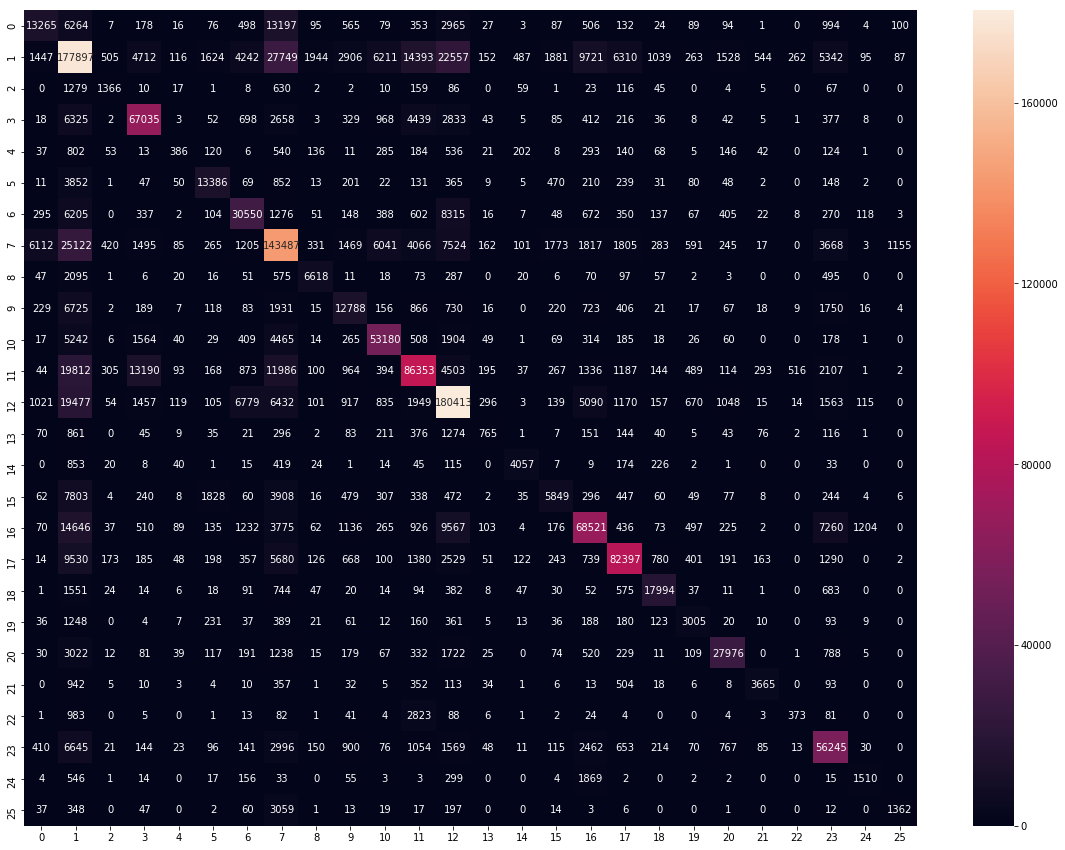

In [309]:
# plt.figure(figsize=(20, 29))
# fig = plt.figure(figsize=(20, 29))

from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,15))
ax=plt.subplot(111)
# sns.heatmap(corr,ax=ax)

pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '', ax=ax)

In [23]:
# import lightgbm as lgb

# lgb_params = {
#     'device':'gpu',
#     'num_class': len(le.classes_),
#     'metric': 'multi_logloss',
#     'objective': 'multiclass', 
#     'max_depth': 7,
#     'num_leaves': 25,
#     'bagging_fraction': 0.75,
#     'feature_fraction': 0.75,
#     'min_data_in_leaf': 300, # important 
#     'learning_rate': 0.1, # change later - trick after found correct num of round multiply num steps by alpha and divide learning rate by alpha
# }


# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_test = lgb.Dataset(X_test, y_test)

# model = lgb.train(lgb_params, lgb_train, 300, valid_sets=[lgb_train, lgb_test], verbose_eval=50)

In [112]:
from keras.models import Model
from keras.layers import Dense, Dropout, Input 

def get_model():
    input_ = Input(shape=(X_train.shape[1], ))
    X = Dense(128, activation='relu')(input_)
    X = Dropout(0.2)(X)
    X = Dense(256, activation='relu')(X)
    X = Dropout(0.2)(X)
    X = Dense(128, activation='relu')(X)
    X = Dropout(0.2)(X)
    X = Dense(len(le.classes_), activation='softmax')(X)
    model = Model(input_, X)
    model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
    return model

In [113]:
nn = get_model()

In [115]:
nn.optimizer.lr = 0.01
nn.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), epochs=1)

Train on 14420535 samples, validate on 1602282 samples
Epoch 1/1
   24064/14420535 [..............................] - ETA: 2:18:41 - loss: 1.5275 - acc: 0.5472

KeyboardInterrupt: 

In [235]:
print('training score', np.mean(y_train == np.argmax(model.predict(X_train), 1)))
print('testing score', np.mean(y_test == np.argmax(model.predict(X_test), 1)))

training score 0.6149222222222223
testing score 0.5933


In [196]:
import  xgboost  as  xgb
from xgboost.sklearn import XGBClassifier

xgb_hyper = {
    'max_depth': 7,
    'n_estimators': 300,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 20,
#     'tree_method': 'gpu_hist'
}

xgb_model = XGBClassifier(**xgb_hyper)
xgb_model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], 
              eval_metric='mlogloss', verbose = 25)

[0]	validation_0-mlogloss:2.76347	validation_1-mlogloss:2.75642
[25]	validation_0-mlogloss:1.40781	validation_1-mlogloss:1.41306
[50]	validation_0-mlogloss:1.23695	validation_1-mlogloss:1.25613
[75]	validation_0-mlogloss:1.18438	validation_1-mlogloss:1.21467
[100]	validation_0-mlogloss:1.15595	validation_1-mlogloss:1.19463
[125]	validation_0-mlogloss:1.13185	validation_1-mlogloss:1.17895
[150]	validation_0-mlogloss:1.11562	validation_1-mlogloss:1.17098
[175]	validation_0-mlogloss:1.10218	validation_1-mlogloss:1.1661
[200]	validation_0-mlogloss:1.09043	validation_1-mlogloss:1.16225
[225]	validation_0-mlogloss:1.08003	validation_1-mlogloss:1.15931
[250]	validation_0-mlogloss:1.07066	validation_1-mlogloss:1.15708
[275]	validation_0-mlogloss:1.0618	validation_1-mlogloss:1.15498
[299]	validation_0-mlogloss:1.05378	validation_1-mlogloss:1.15381


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=20, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [198]:
print('training score', np.mean(y_train == xgb_model.predict(X_train)))
print('testing score', np.mean(y_test == xgb_model.predict(X_test)))

training score 0.6748222222222222
testing score 0.6536


In [243]:
final_data[y==le.inverse_transform(1)][:100]

/home/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


('While applying opacity to a form should we use a decimal or a double value',
 'c')

In [ ]:
import os
os.makedirs(RESOURCE_PATH['THREAD_EMBEDDINGS_FOLDER'], exist_ok=True)

tag_counts = c.most_common()

for tag, counts in tag_counts:
    final_data[]

In [6]:
final_data[:100][:,0]

array(['While applying opacity to a form should we use a decimal or a double value',
       'Percentage width child element in absolutely positioned parent on Internet Explorer 7',
       'How do I calculate someone s age in C',
       'Calculate relative time in C', 'Determine a User s Timezone',
       'Difference between Math Floor and Math Truncate',
       'Filling a DataSet or DataTable from a LINQ query result set',
       'Binary Data in MySQL',
       'What is the fastest way to get the value of',
       'Throw an error in a MySQL trigger',
       'How to use the C socket API in C on z OS',
       'Unloading a ByteArray using Actionscript 3',
       'Check for changes to an SQL Server table',
       'Reliable timer in a console application',
       'Best way to allow plugins for a PHP application',
       'Multiple submit buttons in an HTML form',
       'How do I get a distinct ordered list of names from a DataTable using LINQ',
       'Microsoft Office 2007 file type Mime ty

In [37]:


import nltk
import pickle
import re
import numpy as np

# nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))


re1 = re.compile(r'  +')
def clean_title(text, remove_html=False, other=False):
    
    replace_by_space_re = re.compile('[/(){}\[\]\|@,;]')
    bad_symbols_re = re.compile('[^0-9a-z #+_]')
    
    if remove_html:
        x = re.sub(r'<code>[^>]*</code>', '', x)
        x = re.sub(r'<[^>]*>', '', x)
        x = re.sub(r'[^A-Za-z0-9]', ' ', x)
    text = text.lower()
    text = text.replace('π', 'pi').replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
            'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
            '<br />', "\n").replace('\\"', '').replace('<unk>','u_n').replace(' @.@ ','.').replace(
            ' @-@ ','-').replace('\\', ' \\ ').replace('"',"'").replace('\n', ' ').replace('\r', ' ')
    text = replace_by_space_re.sub(' ', text)
    text = bad_symbols_re.sub('', text)
    text = ' '.join([x for x in text.split() if x and x not in stopwords_set])
    return re1.sub(' ', html.unescape(text).strip())
    
#     if other:
#         x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
#             'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
#             '<br />', "\n").replace('\\"', '').replace('<unk>','u_n').replace(' @.@ ','.').replace(
#             ' @-@ ','-').replace('\\', ' \\ ').replace('"',"'").replace('\n', ' ').replace('\r', ' ').strip()
#     return re1.sub(' ', html.unescape(x).strip())

def clean_tags(tags):
    bad_symbols_re = re.compile('[^0-9a-z #+]')
    tag = tags.lower().split()[0]
    tag = bad_symbols_re.sub('', tag)
    return tag

def text_prepare(text):
    """Performs tokenization and simple preprocessing."""
    
    replace_by_space_re = re.compile('[/(){}\[\]\|@,;]')
    bad_symbols_re = re.compile('[^0-9a-z #+_]')
    stopwords_set = set(stopwords.words('english'))

    text = text.lower()
    text = replace_by_space_re.sub(' ', text)
    text = bad_symbols_re.sub('', text)
    text = ' '.join([x for x in text.split() if x and x not in stopwords_set])

    return text.strip()


import sqlite3
DB_NAME = 'StackOverflow.db'

connection = sqlite3.connect(DB_NAME)
c = connection.cursor() 

def get_data():
    df = pd.read_sql("SELECT title, tags FROM posts WHERE parent_id is NULL", 
                 connection, chunksize=10000)
    all_text = preprocess(df)
    print(len(all_text))
    return all_text
    

def preprocess(df):
    all_text = []
    for i, data in enumerate(df): 
        all_text.extend([(clean_title(title), clean_tags(tag)) for title, tag in zip(data['title'], data['tags'])])
    return all_text



all_titles_tags = get_data()
all_titles_tags[:100]

16022817


[('applying opacity form use decimal double value', 'c#'),
 ('percentage width child element absolutely positioned parent internet explorer 7',
  'html'),
 ('calculate someones age c#', 'c#'),
 ('calculate relative time c#', 'c#'),
 ('determine users timezone', 'javascript'),
 ('difference mathfloor mathtruncate', 'net'),
 ('filling dataset datatable linq query result set', 'c#'),
 ('binary data mysql', 'mysql'),
 ('fastest way get value pi', 'performance'),
 ('throw error mysql trigger', 'mysql'),
 ('use c socket api c++ z os', 'c++'),
 ('unloading bytearray using actionscript 3', 'arrays'),
 ('check changes sql server table', 'sql'),
 ('reliable timer console application', 'c#'),
 ('best way allow plugins php application', 'php'),
 ('multiple submit buttons html form', 'html'),
 ('get distinct ordered list names datatable using linq', 'c#'),
 ('microsoft office 2007 file type mime types identifying characters', 'mime'),
 ('paging collection linq', 'linq'),
 ('add existing comments rd

In [36]:
all_titles_tags[:1000]

[('applying opacity form use decimal double value', 'c#'),
 ('percentage width child element absolutely positioned parent internet explorer 7',
  'html'),
 ('calculate someones age c#', 'c#'),
 ('calculate relative time c#', 'c#'),
 ('determine users timezone', 'javascript'),
 ('difference mathfloor mathtruncate', 'net'),
 ('filling dataset datatable linq query result set', 'c#'),
 ('binary data mysql', 'mysql'),
 ('fastest way get value pi', 'performance'),
 ('throw error mysql trigger', 'mysql'),
 ('use c socket api c++ z os', 'c++'),
 ('unloading bytearray using actionscript 3', 'arrays'),
 ('check changes sql server table', 'sql'),
 ('reliable timer console application', 'c#'),
 ('best way allow plugins php application', 'php'),
 ('multiple submit buttons html form', 'html'),
 ('get distinct ordered list names datatable using linq', 'c#'),
 ('microsoft office 2007 file type mime types identifying characters', 'mime'),
 ('paging collection linq', 'linq'),
 ('add existing comments rd

In [32]:
print(np.asarray(all_titles_tags[:100])[:,1])

['c# winforms type-conversion decimal opacity'
 'html css css3 internet-explorer-7' 'c# .net datetime'
 'c# datetime time datediff relative-time-span'
 'javascript html browser timezone timezoneoffset' '.net math'
 'c# linq web-services .net-3.5' 'mysql database binary-data data-storage'
 'performance algorithm language-agnostic unix pi'
 'mysql database triggers' 'c++ c sockets mainframe zos'
 'arrays actionscript-3 flex' 'sql sql-server datatable rdbms'
 'c# .net vb.net timer' 'php plugins architecture hook'
 'html form-submit html-form submit-button' 'c# linq .net-3.5'
 'mime file-type office-2007' 'linq .net-3.5' 'ruby rdoc'
 'eclipse svn aptana subclipse' 'flex actionscript-3 air'
 'php sql database flat-file' 'linux winapi visual-c++ unix timer'
 'svn tortoisesvn branch branching-and-merging'
 '.net performance memory-leaks com-interop' 'windows svn 64bit'
 'c# sql vb.net ascii hex' 'sql asp.net xml sitemap'
 'java xml csv data-conversion' 'java php oop theory'
 'mysql sql-server